# SVM

## Load Preprocessed Features and Labels

In [1]:
import os
data_dir = os.path.abspath('/home/vhyun/Brainhack/project')

import numpy as np
X_epochs = np.load("X_epochs_data.npy")         # shape: n_epochs=4308, n_channels=19, n_times=1025
X_features = np.load("X_features.npy")          # shape: n_epochs=4308, n_bandpower_features=95
y_labels = np.load("y_epoch_labels.npy")        # shape: n_epochs=4308,

print(X_epochs.shape)
print(X_features.shape)
print(y_labels.shape)

(4308, 19, 1025)
(4308, 95)
(4308,)


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_features,      
    y_labels,       
    test_size=0.4,     # train size:validation size = 60:40
    shuffle=True,
    stratify=y_labels, 
    random_state=123
)

print("Train size:", len(X_train))     # Train size: 2584
print("Validation size:", len(X_val))     # Validation size: 1724

Train size: 2584
Validation size: 1724


## SVM (kfold=10)

In [3]:
# from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Build a tiny pipeline that does feature selection (top 20% of features), 
# and then prediction with our linear svr model.
model = Pipeline([
        ('scaler', StandardScaler()),
        # ('feature_selection',SelectPercentile(f_classif,percentile=20)),
        ('prediction', SVC(kernel='linear', C=100, gamma=1))
                 ])

y_pred = [] # a container to catch the predictions from each fold
y_index = [] # just in case, the index for each prediction

# First we create 10 splits of the data
skf = KFold(n_splits=10, shuffle=True, random_state=123)

# For each split, assemble the train and test samples 
for tr_ind, te_ind in skf.split(X_train):
    X_tr = X_train[tr_ind]
    y_tr = y_train[tr_ind]
    X_te = X_train[te_ind]
    y_index += list(te_ind) # store the index of samples to predict
    
    # and run our pipeline 
    model.fit(X_tr, y_tr) # fit the data to the model using our mini pipeline
    predictions = model.predict(X_te).tolist() # get the predictions for this fold
    y_pred += predictions # add them to the list of predictions

In [4]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_train[y_index], y_pred)

print('ACC:',acc)

ACC: 0.9585913312693498


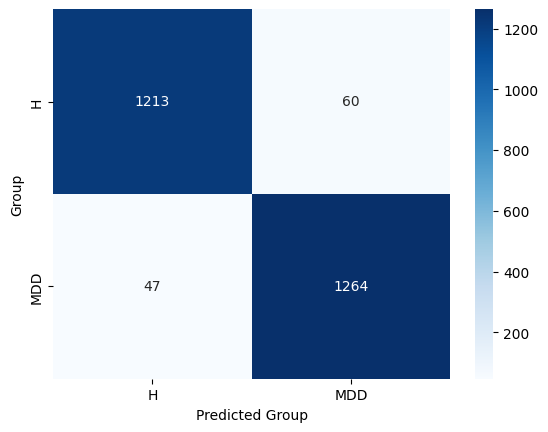

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train[y_index], y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['H', 'MDD'],
            yticklabels=['H', 'MDD'])
plt.xlabel('Predicted Group')
plt.ylabel('Group')
plt.show()

### Hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'prediction__C': 10. ** np.arange(-3, 8),
    'prediction__gamma': 10. ** np.arange(-3, 8)
}

grid = GridSearchCV(model, param_grid=param_grid, cv=10)

grid.fit(X_train, y_train)

print(grid.best_params_)

## SVM + Feature Selection using SelectPercentile (kfold=10)

In [18]:
# from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Build a tiny pipeline that does feature selection (top 20% of features), 
# and then prediction with our linear svr model.
model = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection',SelectPercentile(f_classif,percentile=20)),
        ('prediction', SVC(kernel='linear', C=100, gamma=1))
                 ])

y_pred = [] # a container to catch the predictions from each fold
y_index = [] # just in case, the index for each prediction

# First we create 10 splits of the data
skf = KFold(n_splits=10, shuffle=True, random_state=123)

# For each split, assemble the train and test samples 
for tr_ind, te_ind in skf.split(X_train):
    X_tr = X_train[tr_ind]
    y_tr = y_train[tr_ind]
    X_te = X_train[te_ind]
    y_index += list(te_ind) # store the index of samples to predict
    
    # and run our pipeline 
    model.fit(X_tr, y_tr) # fit the data to the model using our mini pipeline
    predictions = model.predict(X_te).tolist() # get the predictions for this fold
    y_pred += predictions # add them to the list of predictions

In [19]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_train[y_index], y_pred)

print('ACC:',acc)

ACC: 0.8777089783281734


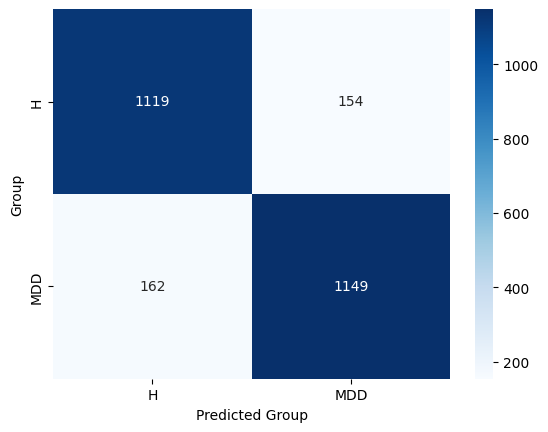

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train[y_index], y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['H', 'MDD'],
            yticklabels=['H', 'MDD'])
plt.xlabel('Predicted Group')
plt.ylabel('Group')
plt.show()

## SVM + Feature Selection using SelectKBest (kfold=10)

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

model = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(f_classif, k=50)),
        ('prediction', SVC(kernel='linear', C=100, gamma=1))
                 ])

y_pred = [] # a container to catch the predictions from each fold
y_index = [] # just in case, the index for each prediction

# First we create 10 splits of the data
skf = KFold(n_splits=10, shuffle=True, random_state=123)

# For each split, assemble the train and test samples 
for tr_ind, te_ind in skf.split(X_train):
    X_tr = X_train[tr_ind]
    y_tr = y_train[tr_ind]
    X_te = X_train[te_ind]
    y_index += list(te_ind) # store the index of samples to predict
    
    # and run our pipeline 
    model.fit(X_tr, y_tr) # fit the data to the model using our mini pipeline
    predictions = model.predict(X_te).tolist() # get the predictions for this fold
    y_pred += predictions # add them to the list of predictions

In [31]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_train[y_index], y_pred)

print('ACC:',acc)

ACC: 0.9202786377708978


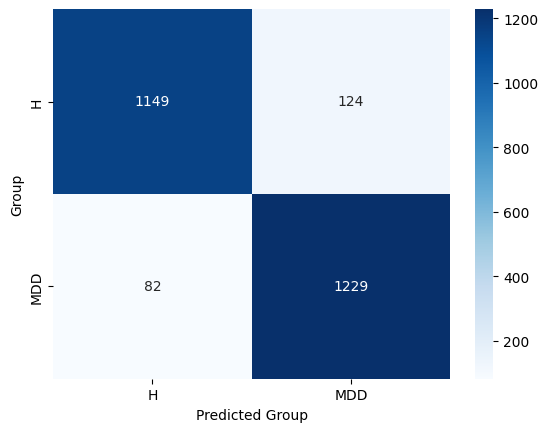

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train[y_index], y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['H', 'MDD'],
            yticklabels=['H', 'MDD'])
plt.xlabel('Predicted Group')
plt.ylabel('Group')
plt.show()

## SVM + Dimension Reduction using PCA (kfold=10)

In [33]:
# from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

model = Pipeline([
        ('scaler', StandardScaler()),
        #('feature_selection',SelectPercentile(f_classif,percentile=20)),
        ('dim_reduction', PCA(n_components=10, random_state=123)),
        ('prediction', SVC(kernel='linear', C=100, gamma=1))
                 ])

y_pred = [] # a container to catch the predictions from each fold
y_index = [] # just in case, the index for each prediction

# First we create 10 splits of the data
skf = KFold(n_splits=10, shuffle=True, random_state=123)

# For each split, assemble the train and test samples 
for tr_ind, te_ind in skf.split(X_train):
    X_tr = X_train[tr_ind]
    y_tr = y_train[tr_ind]
    X_te = X_train[te_ind]
    y_index += list(te_ind) # store the index of samples to predict
    
    # and run our pipeline 
    model.fit(X_tr, y_tr) # fit the data to the model using our mini pipeline
    predictions = model.predict(X_te).tolist() # get the predictions for this fold
    y_pred += predictions # add them to the list of predictions


In [34]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_train[y_index], y_pred)

print('ACC:',acc)

ACC: 0.8459752321981424


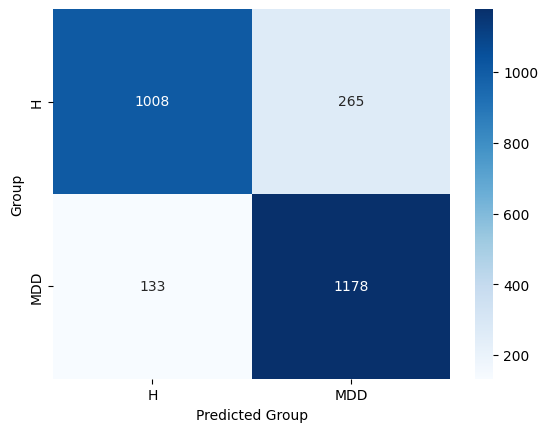

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train[y_index], y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['H', 'MDD'],
            yticklabels=['H', 'MDD'])
plt.xlabel('Predicted Group')
plt.ylabel('Group')
plt.show()